## **Documentation for the environment**

https://gym.openai.com/

In [ ]:
!pip install torch
!pip install torchvision
!pip install numpy
!pip install matplotlib
!pip install gym
!pip install box2d-py
!pip install atari-py

     |████████████████████████████████| 448 kB 5.1 MB/s 


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

## **Frozen lake environment**

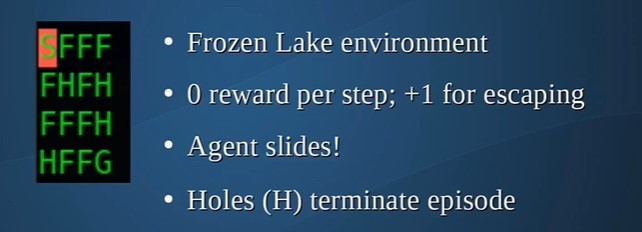

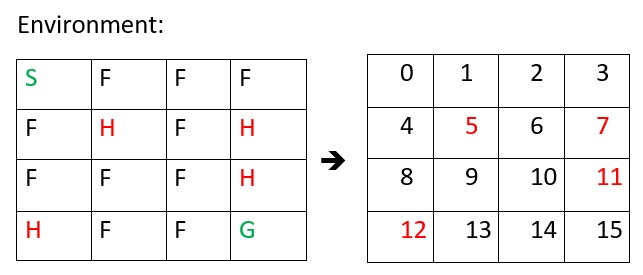

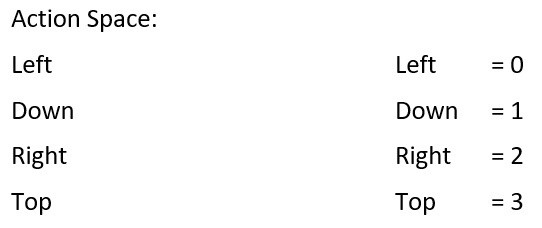

https://github.com/openai/gym/blob/master/gym/envs/toy_text/frozen_lake.py



---



In [ ]:
env = gym.make('FrozenLake-v0')      #instantiate our environment

In [ ]:
env.reset()   #reset the grid

0

In [ ]:
env.render()    #print the grid


SFFF
FHFH
FFFH
HFFG


In [ ]:
env.env.nS  #total number of states

16

In [ ]:
env.env.nA  #total number of actions

4

In [ ]:
env.env.P[6][1]

[(0.3333333333333333, 5, 0.0, True),
 (0.3333333333333333, 10, 0.0, False),
 (0.3333333333333333, 7, 0.0, True)]

In [ ]:
#perform action and see the result

env.reset()
action = 0
(observation, reward, done, prob) = env.step(action)
env.render()
print(observation, reward, done, prob)

  (Left)
SFFF
FHFH
FFFH
HFFG
0 0.0 False {'prob': 0.3333333333333333}




---



### **Random agent**

*   Play 1000 games by randomly sampling actions from the action space
*   Plot win percentage per ten games over time



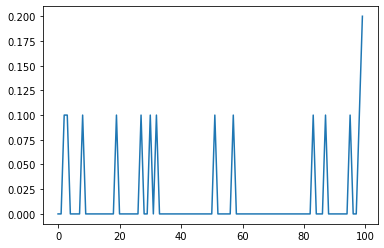

In [ ]:
n_games=1000    #number of games
win_pct = []    #empty list to keep track of win percentages
scores = []     #empty list to keep track of scores

for i in range(n_games):  #loop over the number of games
    done = False         #at the top of every episode reset the done flag
    obs = env.reset()    #reset the environment
    score = 0           #set score for the episode to zero

    while not done:                        #play the episode
      action = env.action_space.sample()           #TAKE RANDOM ACTION
      obs, reward, done, info = env.step(action)   #set the new information
      score += reward                             #keep track of the score for the episode

    scores.append(score)        #at the end of every episode, append score for that epsiode to list of scores

    if i%10 == 0:
      average = np.mean(scores[-10:])
      win_pct.append(average) # every 10 games we keep track of win percentage
plt.plot(win_pct)
plt.show()

# Output: It simply falls in a hole and occasionally it does make it out.The maximum win percentage we see is around 10 percent and it varies from run to run.

### **Resonably Deterministic Policy**

*   Play 1000 games by following deterministic policy
*   Plot win percentage per ten games over time

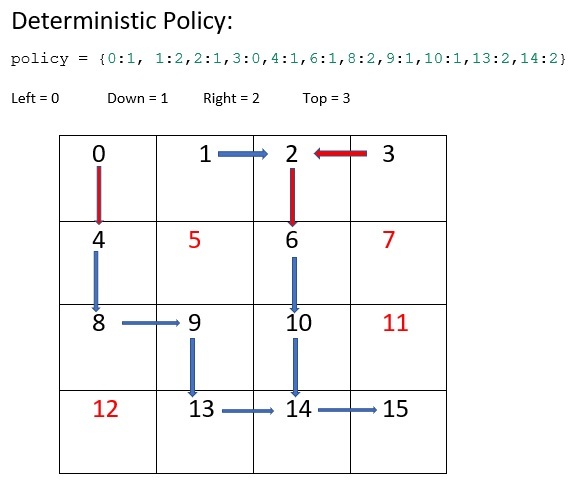

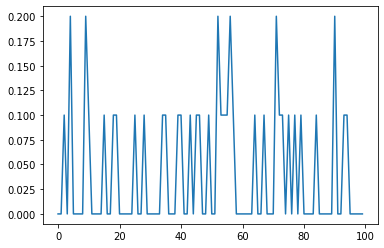

In [ ]:

policy = {0:1, 1:2,2:1,3:0,4:1,6:1,8:2,9:1,10:1,13:2,14:2}    # following deterministic policy
n_games=1000    #number of games
win_pct = []    #empty list to keep track of win percentages
scores = []     #empty list to keep track of scores

for i in range(n_games):  #loop over the number of games
    done = False         #at the top of every episode reset the done flag
    obs = env.reset()    #reset the environment
    score = 0           #set score for the episode to zero

    while not done:                        #play the episode
      action = policy[obs]
      obs, reward, done, info = env.step(action)   #set the new information
      score += reward                             #keep track of the score for the episode

    scores.append(score)        #at the end of every episode, append score for that epsiode to list of scores

    if i%10 == 0:
      average = np.mean(scores[-10:])
      win_pct.append(average) # every 10 games we keep track of win percentage
plt.plot(win_pct)
plt.show()

# Plot gives pretty frequent win rate of 20 percent.Slightly better than the random agent. 